# (I) Dataset Description:

### **Task**:
Collisions at high-energy particle colliders are a traditionally fruitful source of exotic particle discoveries. Finding these rare particles requires solving difficult signal-versus-background classification problems, hence machine learning approaches are often used. The vast majority of particle collisions do not produce exotic particles. Therefore, good data analysis depends on distinguishing collisions which produce particles of interest (signal) from those producing other particles (background).
 
### **Data**:
The data has been produced using Monte Carlo simulations. The first 8 features are kinematic properties measured by the particle detectors in the accelerator. The last ten features are functions of the first 8 features; these are high-level features derived by physicists to help discriminate between the two classes. 

### **Attribute Information**:
The first column is the class label (1 for signal, 0 for background), followed by 18 features (8 low-level features then 10 high-level features). These features are derived physically and are as follows
1.      lepton 1 pT
2.      lepton 1 eta
3.      lepton 1 phi
4.      lepton 2 pT
5.      lepton 2 eta
6.      lepton 2 phi
7.      missing energy magnitude
8.      missing energy phi
9.      MET_rel
10.   axial MET
11.   M_R
12.   M_TR_2
13.   R
14.   MT2
15.   S_R
16.   M_Delta_R
17.   dPhi_r_b
18.   cos(theta_r1)

### **Dataset Summary:**
 
**Task:**
Classification

**Number of Instances:**
5,000,000

**Area:**
Particle Physics

**Attribute Characteristics:**
Real (Floating Point)

**Number of Attributes:**
18

**Year:**
2014

**Compressed size:**
879MB

**Uncompressed size**:
2.23GB

**Missing values:**
None





We load the dataset and examine the first 5 records.


In [ ]:
from google.colab import drive 
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/data mining assn/SUSY.csv', header=None)
df.head()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859


In [ ]:
print(df.values.shape)

(5000000, 19)


**Histograms**

We make histograms of the number of labels and the features with buckets of featuer/label values showing the number of points belonging to a particular range of feature values. We do this to get an idea about the rough distribution of data. We make observations from the histograms and decide our further approach based on them.

                  0
count  5.000000e+06
mean   4.575654e-01
std    4.981961e-01
min    0.000000e+00
25%    0.000000e+00
50%    0.000000e+00
75%    1.000000e+00
max    1.000000e+00


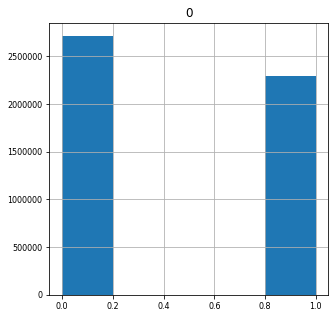

In [ ]:
print(df[df.columns[0:1]].describe())
df[df.columns[0:1]].hist(figsize=(5, 5), bins=5, xlabelsize=8, ylabelsize=8);

Here we see that the number of both 0 and 1 labels are almost equally distributed. As the mean is ~0.46 this further reassures this fact. Also the std. deviation is ~0.5 and Variance ~0.25.
 

                 1             2   ...            17            18
count  5.000000e+06  5.000000e+06  ...  5.000000e+06  5.000000e+06
mean   1.000318e+00  2.192580e-05  ...  9.994852e-01  2.249139e-01
std    6.873341e-01  1.003107e+00  ...  4.360948e-01  1.969804e-01
min    2.548815e-01 -2.102927e+00  ...  3.211849e-07  4.172130e-08
25%    5.624837e-01 -7.573512e-01  ...  6.879128e-01  6.908188e-02
50%    7.915511e-01  1.342127e-04  ...  1.094396e+00  1.672500e-01
75%    1.204413e+00  7.576486e-01  ...  1.369183e+00  3.303652e-01
max    2.055345e+01  2.101605e+00  ...  1.591660e+00  1.000000e+00

[8 rows x 18 columns]


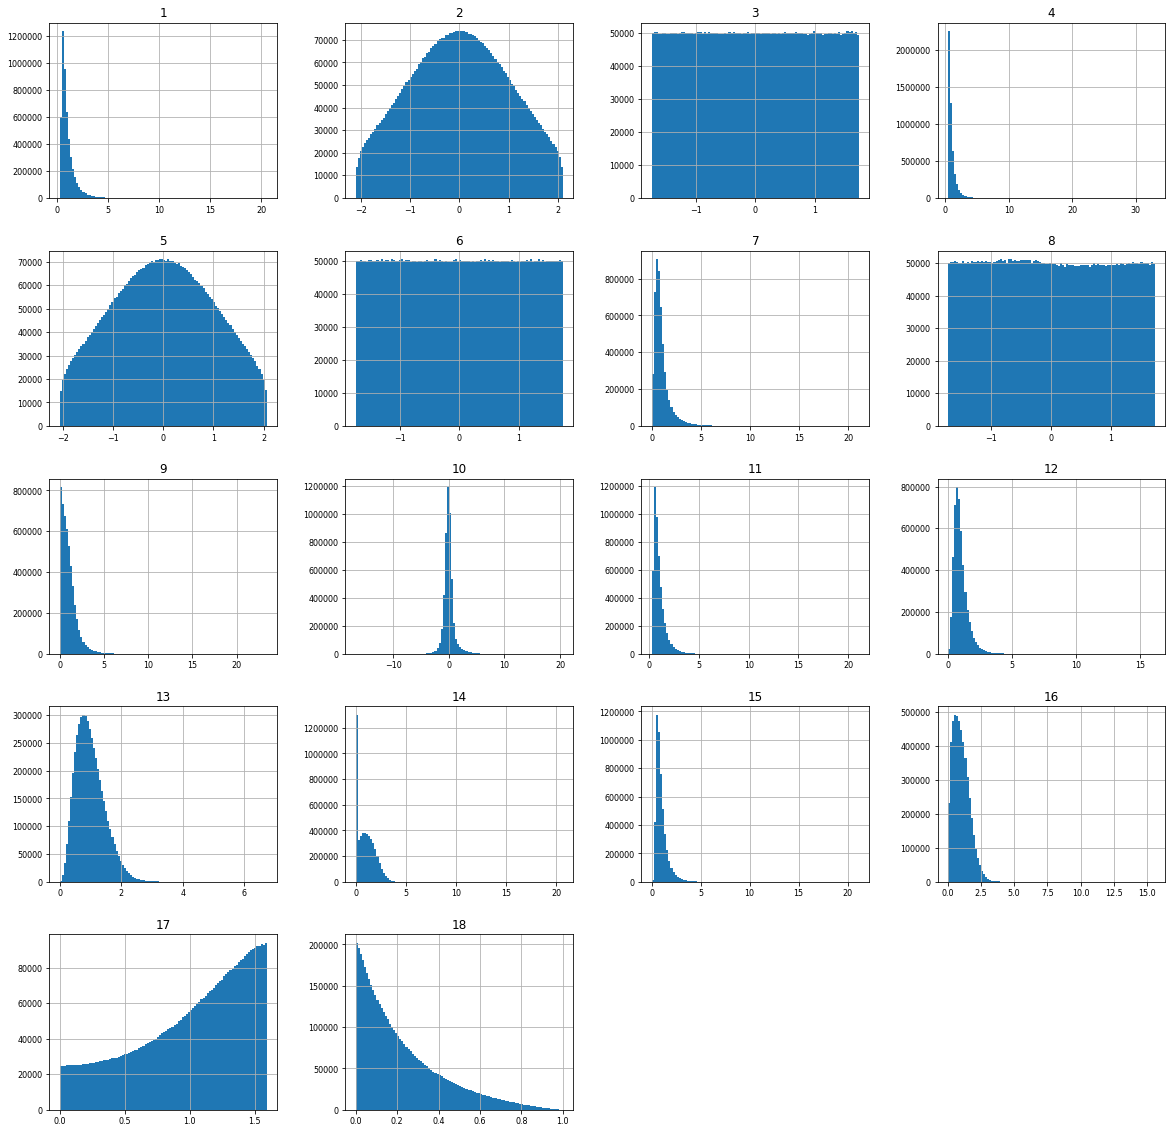

In [ ]:
print(df[df.columns[1:19]].describe())
df[df.columns[1:19]].hist(figsize=(20, 20), bins=100, xlabelsize=8, ylabelsize=8);

Here, we see that features in columns 3,6,8 are almost evenly distributed along their range i.e. [-1.5,1.5]. Hence, we try to plot these separately to analyse them better for any *outliers*. 
We also observe that the feature in column 14 has an abnormally high mode at the value 0 we analyse this further by making *box plot and finding their mean, mode, quartiles.*
We see that features in column 2 and 5 are distributed similarly in [-2,2] so
We further check their correlation which should be high. 

**Box plot to identify outliers**

                  3             6             8
count  5.000000e+06  5.000000e+06  5.000000e+06
mean  -4.994657e-05 -1.972243e-05  3.542352e-05
std    1.001670e+00  1.001631e+00  1.001654e+00
min   -1.734789e+00 -1.734202e+00 -1.727117e+00
25%   -8.673567e-01 -8.683741e-01 -8.661510e-01
50%   -3.880155e-04  2.006134e-04 -9.172642e-03
75%    8.670981e-01  8.674778e-01  8.687620e-01
max    1.734839e+00  1.734686e+00  1.740689e+00


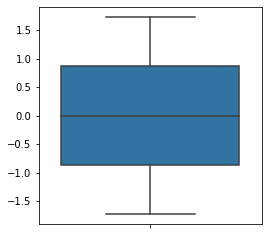

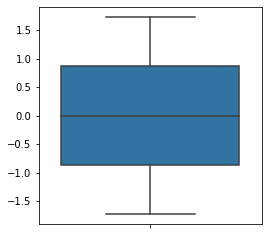

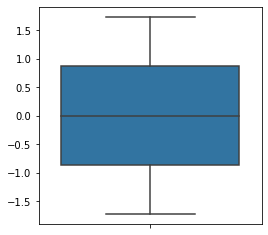

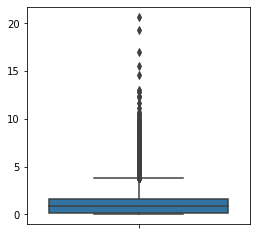

In [ ]:
print(df[[3,6,8]].describe())
for i in [3,6,8, 14]:
  plt.figure(figsize=(4,4))
  sns.boxplot(df[[i]], orient='v')

Here we observe that, there are no outliers in the features in column 3,6,8 and every point lies in the interval [-1.5, 1.5].
We also see that the number of point with the value of feature 14 as 0 are as much as half. As the mean is 1 and the values lie between 0 and 2. But we see that the variation is quite significant as the std. deviation is ~0.86.

We now see the correlation of different features with the label so find out the important features and filter out the non-important features. Correlation helps us identify linear relationship between two variables. If the abs value of corr is high, that means the variables have strong linear dependence. We try to filter out the features by observing their correlation with the labels. For non-linear relationship, we further make scatter plots in the next section.

In [ ]:
df_corr = df.corr()[[0]][1:19]
print(df_corr.sort_values(by=0,ascending=False))



           0
7   0.438821
12  0.423030
1   0.387397
9   0.282778
16  0.272992
18  0.268780
11  0.266589
15  0.258326
4   0.194794
13  0.111937
14  0.079421
10  0.077078
17  0.032656
5   0.000380
8   0.000110
6  -0.000099
2  -0.000328
3  -0.000462


We see that the features in columns 7, 12, 1, 9, 16, 11, 15, 4, 13 have absolute value of correlation coeff >0.1 where as others < 0.1 

But, correlation by itself does not always explain the relationship between data so ploting them could even lead us to new insights and in the same manner, check that our correlated values have a linear relationship to the Label.
For example, relationships such as curvilinear relationship cannot be guessed just by looking at the correlation value so lets take the features we excluded from our correlation table and plot them to see if they show some kind of pattern.

So we now make scatter plots of labels vs individual features, to inspect any non-linear relationship between the two.

**Scatter Plots of labels vs feature values to identify non-linear relationship**

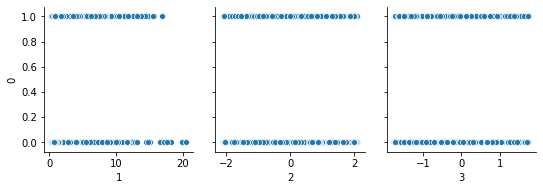

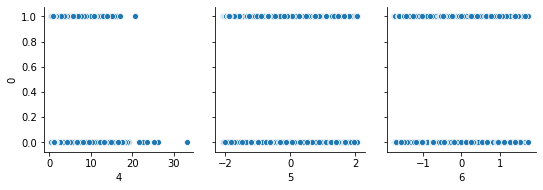

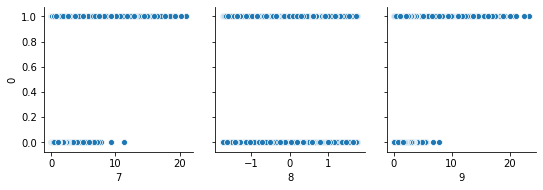

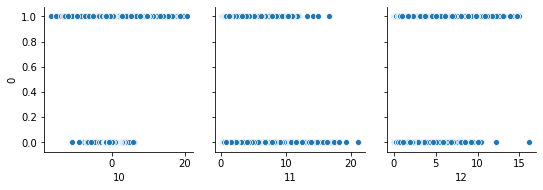

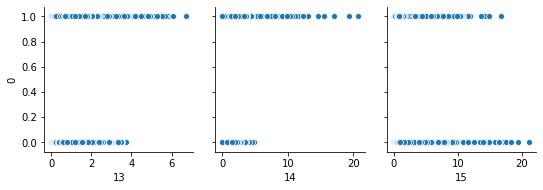

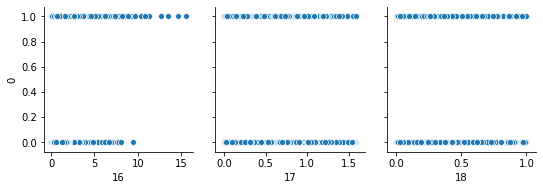

In [ ]:
for i in range(1, len(df.columns), 3):
    sns.pairplot(data=df,
                x_vars=df.columns[i:i+3],
                y_vars=[0])

Hence, we observe that the value of labels occur almost independently for the features in 17,5,8,6,2,3 which are also supported by the correlation of these features with labels being very low. But we also see that, there exists no non-linear realtion ship as well between these features and labels by observing the above plotted graphs.

**Correlation Matrix**
A correlation matrix is a table showing correlation coefficients between variables. Each cell i, j in the matrix shows the correlation between two variables xi and xj. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
Correlation is usually defined as a measure of the linear relationship between two quantitative variables (e.g., height and weight). Often a slightly looser definition is used, whereby correlation simply means that there is some type of relationship between two variables.

**Pearson’s Product-Moment Correlation**

The most common measure of correlation is Pearson’s product-moment correlation, which is commonly referred to simply as the correlation.
1. A correlation of 1 indicates a perfect positive correlation.
2. A correlation of -1 indicates a perfect negative correlation.
3. A correlation of 0 indicates that there is no relationship between the different variables.
4. Values between -1 and 1 denote the strength of the correlation
A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
It is given by the following equation : 
$$\rho_{X,Y} = \frac{E[(X-\mu_X)(Y-\mu_Y)]}{\sigma_X\sigma_Y}$$

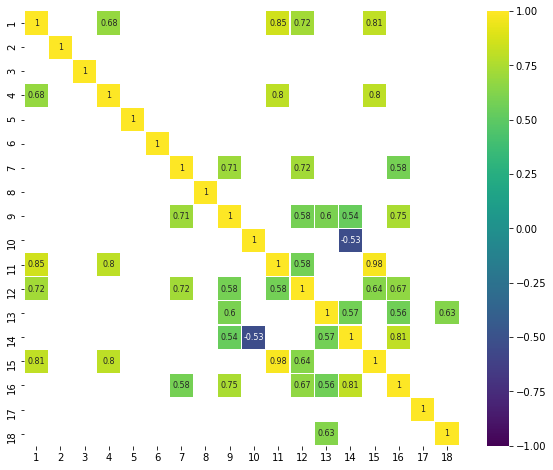

In [ ]:
corr = df.drop(0, axis=1).corr() # We already examined Label correlations
plt.figure(figsize=(10, 8))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Here, we observe that Feature in column 15 is strongly correlated with columns 1, 4 with corr coeff 0f ~0.8 and column 11 with corr coeff of 0.98 hence we can drop off column 15 as column 11 is more strongly correlated with the labels from above observation.
We also see that coumn 14 is strongly correlated to column 16, but since column 16 has much higher correlation with Labels, we can drop off column 14.
We also see that columns 1 and 11 are also very strongly correlated but we can not drop off any of them as both are correlated with labels. So is with column 4 and 11. Hence, we can now boil down out important features to [7,12,1,9,16, 11,4,13]

**PCA**

PCA is used for demensionality reduction. It finds a new set of dimensions (or a set of basis of views) such that all the dimensions are orthogonal (and hence linearly independent) and ranked according to the variance of data along them. It means more important principle
axis occurs first. (more important = more variance/more spread out data).
This can be formulated as an optimization problem as follows,

$$w_{(k)} = arg\,max_{\Vert w \Vert = 1} {\Vert X_k w \Vert^2} = arg\,max {\frac{w^T X^T_kX_kw}{w^Tw}}$$

The solution to this equation is given by the eigen vectors of $X^TX$ where X is the data matrix. Note that features of X are zero mean normalized. 


[ 26.4  46.3  54.3  61.7  68.6  74.3  79.7  84.4  87.9  91.1  94.2  95.9
  97.1  98.1  98.9  99.5  99.9 100.1]


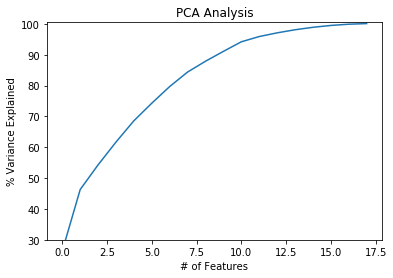

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_scaled = sc.fit_transform(df.drop(0))
from sklearn.decomposition import PCA
covar_matrix = PCA(n_components = 18)
covar_matrix.fit(df_scaled)
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
print(var)
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

Based on the above graph it's clear that 11 features are able to explain the 95% of variation in data. Hence, we should pick 11 most important features based on the PCA of the given data.

**Clustering using K-Means algorithm**

K-means is a type of unsupervised learning and one of the popular methods of clustering unlabelled data into k clusters. One of the trickier tasks in clustering is identifying the appropriate number of clusters k.The process begins with k centroids initialised at random.These centroids are used to assign points to its nearest cluster.The mean of all points within the cluster is then used to update the position of the centroids.
The above steps are repeated until the values of the centroids stabilise.

**Elbow Method to find out optimal value of k**

For each k value, we will initialise k-means and use the **inertia attribute** which is the *sum of squared distances of samples to the nearest cluster centre.*This tells us the denseness of our clusters. As k increases, the sum of squared distance tends to zero. Imagine we set k to its maximum value n (where n is number of samples) each sample will form its own cluster meaning sum of squared distances equals zero.
Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

In [ ]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 20):
    print(i)
    kmeans = KMeans(n_clusters = i).fit(df.drop(0))
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

1
2
3
4
5
6
7
8
9


The plot looks like this:
![alt text]()
From this plot, we can conclude that the optimal value of k is 9


# (III) **Supervised Machine Learning Techniques**

In this section of the assignment, we aim to use the 18 features in the dataset to predict the target label, i.e. given a vector of features of physical measurements, predict whether the observation corresponds to a signal event or a background event. 

To begin with, we first prepare the dataset as follows:




In [ ]:
from sklearn.utils import shuffle

X = df.values[:,1:]
y = df.values[:,0]

#we shuffle the dataset as follows:
X, y = shuffle(X, y)

## Decision Tree with Pruning

Decision Tree is a simple tree-based classification method that builds a structure for taking decisions based on feature values. Each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

The question of how to build a decision tree is complex and many different algorithms have been proposed. The most popular ones are ID3 and CART. The sklearn implementation, which we have used in this assignment, uses a modified version of CART. (https://scikit-learn.org/stable/modules/tree.html)



For this method, we used the first 1,000,000 examples for training and validation, with a 20% split of examples for testing (after randomly shuffling the data). Due to lack of computational power and the large size of the dataset, along with the computational complexity of the method, we have not trained our model on the complete corpus of 5,000,000 data points. 


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:100000], y[:100000], test_size=0.2, random_state=0)


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
print("Training accuracy:", clf.score(X_train, y_train))
print("Testing accuracy:", clf.score(X_test, y_test))


As expected, we see that the decision tree has overfit on the training data. Even though it yields an accuracy of 100% on the training data, it exhibits poor performance on the test set yielding only 70% accuracy.

The different methods of regularization in a decision tree are:
1. Restricting the depth of the tree
2. Having a minimum number of samples to be maintained at the leaf.
3. Tree pruning

We now examine how tree pruning can be used as an effective means of regularization. Since sklearn only provides methods of post-pruning, we use minimum cost complexity pruning.

### Minimum Cost Complexity Pruning

In this algorithm, we use a parameter $\alpha \geq 0$, which is known as the complexity parameter. The complexity parameter is used to define the cost-complexity measure $R_{\alpha}(T)$ of a given tree $T$,
$$R_{\alpha}(T) = R(T) + \alpha |T|$$
where $|T|$ is the number of terminal nodes in T and $R(T)$ is traditionally defined as the total misclassification rate of the terminal nodes. The objective of minimal cost-complexity pruning is to find the subtree of T that minimizes $R_{\alpha}(T)$.

The cost complexity of a single node is $R_{\alpha}(t)= R(t) + \alpha$. We define $T_t $ to be a tree with root as node. We define the effective $\alpha$ of a node to be the value, for which $R_\alpha(T_t) = R_\alpha(t)$. The reasoning behind this is that, we are replacing subtrees at every level with a node, if the subtree and the node have the same effective complexity. Thus, we are effectively reducing the size of the tree. This effective value of $\alpha$ is given by $$\alpha_{eff}(t) = \frac{R(t)-R(T_t)}{|T|-1}$$

Now, we note that a non-terminal node with the smallest value of $\alpha_{eff}$ is the weakest link that is to be pruned.

We first obtain the values of effective alphas computed at every node. This is done by calling the `clf.cost_complexity_pruning_path` function

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

We plot the ccp_alpha values vs the impurity at the node. With increasing value of $\alpha$ we notice an increase in the impurity at the node, suggesting that these nodes are the most "diverse". However, we note the presence of high purity nodes at the lower values of `ccp_alpha`. This suggests that we need to prune using $\alpha_{eff}$ values between 0 and 0.01.

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

We examine the values of `ccp_alpha` between 5e-5 and 1e-3. We plot the training and test accuracies we obtain by restricting the effective alpha values at the different nodes


In [ ]:
clfs = []

ccp_alphas = np.linspace(0.00005, 0.001, 10)
print(ccp_alphas.shape)
for ccp_alpha in ccp_alphas:
    print("Training with value: ", ccp_alpha)
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

As we can notice from the graph, from lower values of $\alpha$ we are in the overfitting regime (characterized by low training error and high testing error), while for higher values of $\alpha$ we are in the underfitting regime (characterized by high training error and high testing error).

Thus we obtain a sweet-spot for the value of $\alpha$ at roughly 1.5e-4.

In [ ]:
clf_final = DecisionTreeClassifier(random_state=0, ccp_alpha=1e-4)
clf_final.fit(X_train, y_train)
print("Training accuracy: ", clf_final.score(X_train, y_train))
print("Test accuracy: " , clf_final.score(X_test, y_test))


For this value of $\alpha$ we obtain a test accuracy of 78%


## Random Forests
The second method that we are going to examine is Random Forests. Random forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a collection or 'forest' of decision trees at training time. They output the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Although similar to bagging with decision trees, the main difference is that, in random forests, the decision trees are built on a *random subset of features* as opposed to the complete feature set in bagging. This is done to ensure that the ensemble trees constructed are as uncorrelated as possible.

In this assigment, we use the implementation of random forests from the Scikit-Learn Library. (https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

As above, we have only used 1,000,000 out of the 5,000,000 datapoints in the corpus


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X[:1000000], y[:1000000], test_size=0.2, random_state=0)

#create a RandomForestClassifier with 5 estimators
clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train, y_train)

print("Training done")
print("Training accuracy: ", clf.score(X_train, y_train))
print("Test set accuracy: ", clf.score(X_test, y_test))

We notice that although a high training accuracy was obtained on our model, the test accuracy is comparitively poor. Hence, we need to generalize our model to prevent overfitting. We do so by increasing the bias and decreasing the variance.

In this particular algorithm, the means of regularization in a Random Forest is by 
1. decreasing the number of estimators or decision trees.
2. decreasing the maximum depth of the tree using the `max_depth` option.
However, decreasing the number of estimators also decreases the model capacity, thus reducing the model's ability to learn relationships among the data effectively. Thus we regularize by decreasing the maximum depth of the trees.

On varying the `max_depth` and increasing the number of estimators, we obtain the following results

In [ ]:
val_acc = []
tr_acc = []
for depth in range(2, 20, 2): 
  clf = RandomForestClassifier(n_estimators=10, max_depth = depth)
  clf.fit(X_train, y_train)
  print("For depth = ", str(depth))
  print("Training done")
  print("Training accuracy: ", clf.score(X_train, y_train))
  print("Test set accuracy: ", clf.score(X_test, y_test))
  val_acc.append(clf.score(X_test, y_test))
  tr_acc.append(clf.score(X_train, y_train))
  print()

plt.plot(val_acc, label='Validation accuracy')
plt.plot(tr_acc, label='Training accuracy')
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Thus we notice that for a random forest with 10 trees, we obtain the best results when the maximum depth is restricted to 14. The validation accuracy is 79.8%

However, the major disadvantage is the prohibitively high training time. It takes a long time to train even a simple subset of the data.



## Naive Bayes

In machine learning, naïve Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with an assumption of strong (naïve) independence between the features. They are widely used in spam-mail classification systems.

Given a feature vector $(x_1, x_2, ... x_n)$, the Naive Bayes framework outputs a probability $P(C|(x_1, x_2, ..., x_n))$. It uses the Bayes' rule, i.e
$$P(C|x_k) \propto P(x_k|C) P(C)$$
along with the assumption of feature independence, i.e. $$P(x_1, x_2, ..., x_n|C) = P(x_1|C)P(x_2|C) ... P(x_n|C)$$

For each of the $P(x_i|C)$ a parametric form of some distribution is assumed. During the training process, these parameters are calculated using the Maximum Likelihood Estimation technique, or some other parametric estimation procedure. 

In this assignment, we have used a Gaussian Naive Bayes classifier, i.e. the form assumed for the $P(x_i|C)$ is as follows:
$$P(x_i|C) \propto e ^ {(\frac{-(x-\mu)^2}{2\sigma^2})}$$

where the parameters $\mu$ and $\sigma$ are the $ML$ estimates from the data


In [ ]:
from sklearn.naive_bayes import GaussianNB

#we use the entire training data set, with a 20% split for testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print("Training Accuracy: ", gnb.score(X_train, y_train))
print("Testing Accuracy: ", gnb.score(X_test, y_test))

Although we do not reach a high accuracy, achieving results of 73%, a few major observations stand out:
1. Training time is very fast. Since the only calculations involved are calculating mean and variance for each class, along with frequency calculations, results are obtained almost instantaneously. This is despite the large number of training examples used (~5,000,000)
2. There is no overfitting. Naive Bayes generalizes well
3. There are no hyperparameters to tune. The algorithm runs deterministically and reports the same results with every run.

Thus, it gives a good, quick baseline, trained on the entire dataset


## KNN

K-Nearest Neighbours or KNN is a type of non-generalizing learning. It simply stores the entire training data and doesn't attempt to to generate a $P$($x$,y) distribution. $K$ is a hyperparameter supplied by the user. The algorithm, when used to predict a new data point, computes the distance between the new data point and all the previously data points on which the model was trained. It then selects the k-nearest data points. A vote of their labels is taken and the majority label is assigned to the data point. 

We use a subset of the data consisting of 10000 data points since kNN is a slow algorithm, taking $O(mn)$ time for test set inference, where $m$ is the training set size and $n$ is the test set size.

We plot the training and validation accuracy for different values of k and obtain the following results:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X[:10000], y[:10000], test_size=0.2, random_state=0)

val_acc = []
tr_acc = []

for k in range(10, 30, 2):
  clf = KNeighborsClassifier(k)
  clf.fit(X_train, y_train)
  print("Value of k: ", k)
  print("Training accuracy: ", clf.score(X_train, y_train))
  print("Validation accuracy: ", clf.score(X_test, y_test))
  val_acc.append(clf.score(X_test, y_test))
  tr_acc.append(clf.score(X_train, y_train))
  print()

plt.plot(range(10, 30, 2), val_acc, label='Validation accuracy')
plt.plot(range(10, 30, 2), tr_acc, label='Training accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Thus, we notice that the best results are obtained for k = 28, with test accuracy = 76%

## ANN
Artificial Neural Network or ANN is one of the most popular algorithm for classification today. It is a sequence of layers made up of nodes. The nodes of each layer are interconnected to the ones in the layer before and after it. Each connection is also given a weight. The input is propagated in the forward direction through the model and based on the output and the correct label, the error is calculated and propagated backwards through the model to update the weights. The presence of activation functions give the neural network its exceptional ability to learn non-linear decision boundaries. We are using the `keras` library to create our ANN Model.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import optimizers

neurons = [50, 100, 200, 300]
val_acc = []
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

for hidden in neurons:
  model = Sequential([
      Dense(hidden, input_shape=(18,), activation='relu'),
      Dense(hidden, activation='relu'),
      Dense(hidden, activation = 'relu'),
      Dense(1),
      Activation('sigmoid'),
  ])

  adam = optimizers.Adam(lr=1e-3)

  model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=1024)
  scores = model.evaluate(X_test, y_test)
  val_acc.append(scores[1])

In [ ]:
plt.plot(neurons, val_acc, label='Validation accuracy')
plt.xlabel("Number of neurons in the hidden layer")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We observe that the best validaton accuracy is obtained when the number of hidden nodes are 200

We now try to observe the effect of the activation function. We use the sigmoid activation function to check whether we get a better performance.

In [ ]:
hidden = 200
model = Sequential([
      Dense(hidden, input_shape=(18,), activation='sigmoid'),
      Dense(hidden, activation='sigmoid'),
      Dense(hidden, activation = 'sigmoid'),
      Dense(1),
      Activation('sigmoid'),
  ])

adam = optimizers.Adam(lr=1e-3)

model.compile(optimizer=adam,
                loss='binary_crossentropy',
                metrics=['accuracy'])
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=1024)
scores = model.evaluate(X_test, y_test)
print("Validation accuracy: ", scores[1])

We observe that we get a slightly lower performance using sigmoid as the activation function.


## Bagging with Trees
Bagging is one of the ensemble methods, the goal of which is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator. Here, in the case of Bagging with Trees, our base estimator is a Decision Tree. Random subsets of the training data are selected(with replacement) with their entire set of features(as opposed to random forests) to train a number of Decision Trees and then their predictions are aggregated to form the final prediction. This model has less variance as opposed to a single Decision Tree.


In this section, we use different number of decision trees to obtain the training and validation accuracy.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier 

X_train, X_test, y_train, y_test = train_test_split(X[:100000], y[:100000], test_size=0.2, random_state=0)

val_acc = []
tr_acc = []

for n_estimators in range(10, 50, 10):
  bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.3, n_estimators=n_estimators).fit(X_train,y_train)
  print("Number of estimators ", n_estimators)
  val_acc.append(bagging.score(X_test, y_test))
  tr_acc.append(bagging.score(X_train, y_train))
  print("Training Accuracy: ", bagging.score(X_train, y_train))
  print("Testing Accuracy: ", bagging.score(X_test, y_test))
  

In [ ]:
plt.plot(range(10, 50, 10), val_acc, label='Validation accuracy')
plt.plot(range(10, 50, 10), tr_acc, label='Training accuracy')
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# Results

We obtain the following results on each of the different classification techniques we used:

1. Decision tree with pruning: 78%
2. Random Forests: 79.8%
3. k-NN
4. Naive Bayes: 73%
5. Artificial Neural Networks: 80%
6. Bagging with Decision Trees: 79.6%

# Conclusions

We perform EDA on the dataset and observe that out of the 18 features, out of which 11 features explained 95% of the variance. Although we don't have correlated features in the training set, this suggests that there is a degr


We observe that we get roughly similar results on all datasets. This might be attributed to the label noise in the data-set itself, since even complex non-linear classifiers like neural networks do not yield better results than the other classifiers.

The advantage of tree-based methods is the ease of interpretation and ability to explain the data well. However they are highly prone to overfitting. While methods like tree-pruning are effective, hyper-parameter tuning to choose the right parameter can be computationally expensive. 

Random Forests mark a slight improvement since it is an ensemble method that builds multiple decision trees at once on disjoint feature subsets. The trees are uncorrelated. However, we notice that they take a long time to train, even on a subset of the data.

k-NN is a simplitic algorithm that does not scale well. It takes quadratic time during inference, and therefore is unsuitable for large datasets such as the one that we have used in this problem.

Naive Bayes algorithm is quick and simple, but this advantage is also it's downside - it cannot fit the training data well. Training is almost instantaneous, however, it achieved the worst results out of all the methods.

Neural Networks are complex machine learning models that employ gradient descent. They are considered state of the art for many problems today. In this problem, they achieved satisfactory results that matched the other training methods. They were also the only major method that could effectively use the entire training set.

Bagging improved the performance of normal decision trees, and as expected gave better results with increasing number of estimators. However, even a small increase in performance comes at a cost of a large increase in model capacity and complexity. Thus, it can get cumbersome to train these models.


# References
1. Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)
2. Decision Trees - https://scikit-learn.org/stable/index.html
3. Pruning - https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py
4. Random Forests - https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees
5. Naive Bayes - https://en.wikipedia.org/wiki/Naive_Bayes_classifier
6. https://scikit-learn.org/stable/modules/naive_bayes.html
7. kNN - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
8. Keras - https://keras.io/
9. Bagging - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
10. PCA - https://en.wikipedia.org/wiki/Principal_component_analysis